# Introduction to Data Science
## Homework 3

Student Name: Zhengyuan Ding

Student Netid: zd415
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

$\begin{align*}
\text{Information Gain} &= H(Y)-H(Y\mid X)\\
&= -\sum_{y \in Y} p(y) \cdot log(p(y)) - \sum_{x \in X} p(x) \cdot H(Y \mid X = x)\\
&= -\sum_{y \in Y} p(y) \cdot log(p(y)) - \sum_{x \in X} p(x) \cdot [-\sum_{y \in Y} p(y \mid x)log(p(y \mid x)) ]\\
&=  -\sum_{y \in Y} p(y) \cdot log(p(y))+\sum_{x \in X} p(x) \cdot \sum_{y \in Y} \frac{p(x,y)}{p(x)}log(\frac{p(x,y)}{p(x)}) \\
&= -\sum_{y \in Y}\sum_{X \in x}p(y \mid x)p(x)log(p(y))+\sum_{x \in X}  \sum_{y \in Y}p(x,y)log(\frac{p(x,y)}{p(x)})\\
&=-\sum_{y \in Y}\sum_{X \in x}p(x,y)log(p(y))+\sum_{x \in X}  \sum_{y \in Y}p(x,y)log(\frac{p(x,y)}{p(x)})\\
&= \sum_{y \in Y}  \sum_{x \in X}p(x,y)[log(\frac{p(x,y)}{p(x)})-log(p(y))]\\
&=\sum_{y \in Y}  \sum_{x \in X}p(x,y)log(\frac{p(x,y)}{p(x)p(y)})\\
&= \text{Mutual Information}
\end{align*}
$

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [1]:
import pandas as pd
import numpy as np

#load data and add the header names
data = pd.read_csv('cell2cell_data.csv',header = None,
                  names=['revenue','outcalls','incalls','months','eqpdays','webcap',
                          'marryyes','travel','pcown','creditcd','retcalls','churndep'] )
data.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,48.82,10.00,3.0,26,780,0,0,0,0,1,4,1
1,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
2,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
3,51.42,0.00,0.0,36,59,1,0,0,0,0,4,1
4,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1


In [2]:
indices = list(range(data.shape[0]))

#set training set size as 80%
train_size = int(0.8*data.shape[0])

#shuffle dataset indices for uniform sampling
np.random.shuffle(indices)

#extract training and test set using indices
train_idx, test_idx= indices[:train_size],indices[train_size:]
train_df, test_df = data.iloc[train_idx],data.iloc[test_idx]

#print the size of the training and test set
print('train size:{} \ntest size: {}'.format(len(train_df), len(test_df)))

train size:31887 
test size: 7972


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

#### Answer:
If it's random sampling, then the probability of a feature variable will not differ significantly given it's in the training set or the whole dataset, that is:
$$P(\text{X}_i \mid \text{Training set})= P(\text{X}_i)$$
$$P(\text{X}_i \mid \text{Test set})= P(\text{X}_i)$$
also the expectation should not differ significantly as well:
$$E(\text{X}_i \mid \text{Training set})= E(\text{X}_i)$$
$$E(\text{X}_i \mid \text{Test set})= E(\text{X}_i)$$
Therefore, we could do a hypothesis test on whether the difference between the mean of each variable given in the training set and their original mean in the inintial dataset is siginificant or not. The same process also applies to the test set sampling to compare the mean difference. If the difference is not significant, say within the confidence interval of 95%, then we can say that the training set is independent of feature $X_i$. Thus we can prove that the code we did above is uniform random sampling. 

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [3]:
from sklearn.tree import DecisionTreeClassifier
Y = train_df['churndep']
X = train_df.drop('churndep',axis = 1)
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

In [4]:
importance_lst = list(zip(dt.feature_importances_,X.columns.values))
importance_lst.sort(key = lambda x: x[0])
importances, features = zip(*importance_lst)

Text(0,0.5,'Normoalized Gini Importance')

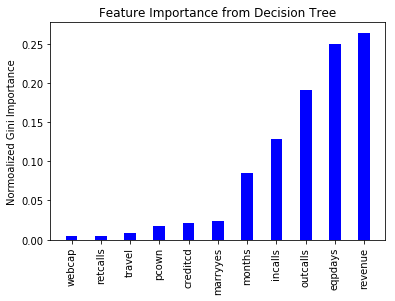

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
width = 0.4
ax.bar(np.arange(11), importances, width, color = 'blue')
ax.set_xticks(np.arange(len(importances)))
ax.set_xticklabels(features, rotation = 90)
plt.title('Feature Importance from Decision Tree')
ax.set_ylabel('Normoalized Gini Importance')

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

In [6]:
train_df[['outcalls','eqpdays','revenue','churndep']].corr()

,outcalls,eqpdays,revenue,churndep
outcalls,1.000000,-0.244255,0.502784,-0.037562
eqpdays,-0.244255,1.000000,-0.223031,0.113271
revenue,0.502784,-0.223031,1.000000,-0.014134
churndep,-0.037562,0.113271,-0.014134,1.000000


####  Answer:
The top 3 most important features are revenue, eqpdays and outcalls. The correlations between the three features are shown above in the table. 

* relationship between the top3 variables

outcalls and eqpdays are negatively related, which means more outbound calls are related to shorter days the customer has had his/her equipment. People who have more outbound calls are likely to care less about their phone expenditures, since the cost of outbound calls are relatively high. Therefore, they might spend money to change their equipment more frequently. 

outcalls and revenue are positively correlated in that when one has higher revenue, he/she cares less about the higher cost for outbound calls. Therefore, the outcalls will be higher when revenue is higher. Another explaination would be that those people with higher revenue tends to have more opportunities to travel outbound, and that results in a higher number of outcalls.

revenue and eqpdays are negatively correlated in the sense that wealthier people can afford buying new equipments, so they change their equipments more frequently. Thus, high revenue correlates with shorter number of days the customer own his/her current equipment.

* relationship between the top3 variables and the churn outcome

outcalls and revenue are both negatively correlated with churndep, which means that more outcalls or higher revenue are related to lower churn probability. This makes sense in our real life. When people have higher revenue, they dont' care about price much. They don't usually compare with and switch to other cell phone services in order to get a cheaper plan. Instead, they will stay in the plan regardless of discounts from other providers. In terms of outcalls, people who have more outbound calls tend not to switch plans since it's complicated to study and learn about the new policies of the outbound call from another provider. They get used to and are familiar with the outbound-call policies of the current plan so the possibility to churn is likely to be low.

eqpdays correlates with churndep positively. This means if people stay with his/her current equipment for longer period, their probability to churn will be high. For example, a service plan is bound to an equipment from purchase and the phone is only unlocked after a certain period. Therefore, when that locked period expires, people have the choice to switch their phone providers. In this case, the more days owning the equipment, the possibility of churn will be higher. 

6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [7]:
# Code here
from sklearn.metrics import accuracy_score
train_acc = dt.score(train_df.drop('churndep',axis = 1),train_df['churndep'])
test_acc = dt.score(test_df.drop('churndep',axis = 1),test_df['churndep'])
print('train accuracy:{} \ntest accuracy: {}'.format(train_acc,test_acc))

train accuracy:0.9998118355442657 
test accuracy: 0.530356246864024


####  Answer:
There is a huge gap between training and test accuracy. The training accuracy is very high close to 100% while the test accuracy is only about 53%. It indicates a possilbe overfitting, that is, the decision tree model is getting too complex and is memorizing the training set. Thus when applying the model to the unknown data from test set, it's using the training set data pattern that it has memorized instead of generalizing the pattern.

### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [8]:
min_samples_split_values = np.linspace(0.01, 0.275, 10)
min_samples_leaf_values = np.linspace(0.01, 0.2, 10)

In [9]:
print(min_samples_split_values)
print(min_samples_leaf_values)

[0.01       0.03944444 0.06888889 0.09833333 0.12777778 0.15722222
 0.18666667 0.21611111 0.24555556 0.275     ]
[0.01       0.03111111 0.05222222 0.07333333 0.09444444 0.11555556
 0.13666667 0.15777778 0.17888889 0.2       ]


2\. Explain in words your reasoning for choosing the above ranges.

#### Answer:
The min_sample_split represents the minimum number of samples required to split an internal node. The simplest dt model should just do one split of root node, that is 100% of all the samples. Therefore min_sample_split value should $\in (0, 1]$. The same reasoning also applies to the min_sample_leaf values. Since it is the minimum number of samples required to be at a leaf node, the max of it will be 100%/2 = 50%. Therefore the min_samples_leaf value should $\in (0,0.5]$ 

To prevent overfitting, the value should not be too small since the model will get too complicated as the tree grows. Also it should not be too big as the model will get too simple. So I firstly set both value in linspace(0.05, 0.5, 10). However, the trend of resulting test accuracy using min_samples_leaf values between 0.05 and 0.45 are too close (the line from 0.2 to 0.4 are even overlapping)， while there is a large gap between those lines and the one for 0.5. Thus I minimize the min_leaf range to linspace(0.01, 0.2,10) to make the accuracy variance larger.

I apply the same reasoning in terms of the min_samples_split values. The trend of all values doesn't change after 25%, so I change the value range to linspace(0.01,0.275,10) to show more accuracy variance.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

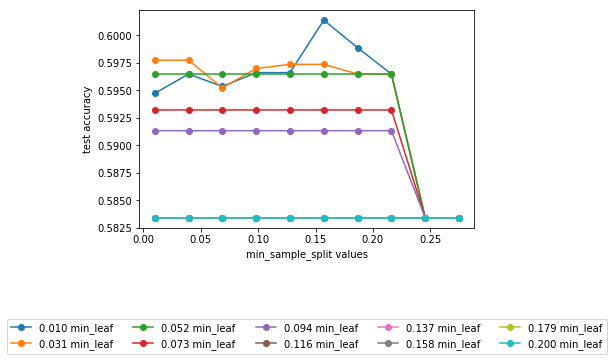

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#creat a list to store the test accuracy
test_acc_hist = []

#iterate through each combination of min_samples_leaf and min_samples_split
for min_leaf in min_samples_leaf_values: 
    test_acc = []
    for min_split in min_samples_split_values:
        #build dt model
        dt_tuning = DecisionTreeClassifier(criterion='entropy',
                                           min_samples_split = min_split,
                                           min_samples_leaf = min_leaf)
        #fit the training data
        dt_tuning.fit(train_df.drop('churndep', 1),train_df['churndep'])
        #store the test accuracy
        test_acc.append(dt_tuning.score(test_df.drop('churndep',1),
                                                  test_df['churndep']))
    test_acc_hist.append(test_acc)
    
    #plot a line for each min_samples_leaf value
    plt.plot(min_samples_split_values,test_acc, 
             label= '{0:.3f} min_leaf'.format(min_leaf),
             marker = 'o')

plt.xlabel('min_sample_split values')
plt.ylabel('test accuracy')
plt.legend(loc = 'center', bbox_to_anchor = (0.5, -0.5), fancybox = True,
           ncol = 5, prop = {'size':10})

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

#### Answer:
The configuration that returns the best accuracy is the 6th value in min_samples_split_values and the first one in min_samples_leaf_values. That is:
$$\text{min_samples_split} = 15.72 \% $$
$$\text{min_samples_leaf} = 1 \% $$
The best test accuracy resulting from the above configuration is $60.1 \%$

In [11]:
#get the index of min_leaf and min_split
leaf,split = np.unravel_index(np.asarray(test_acc_hist).argmax()
                              , np.asarray(test_acc_hist).shape)
print('index for min_leaf and min_split of best test accuracy: {}, {}'.format(leaf, split))
print('Best test accuracy: {}'.format(test_acc_hist[leaf][split]))

#show the value of selected min_samples_split and leaf values
print('min_samples_split = {0:.2f}%'.format(min_samples_split_values[split]*100))
print('min_samples_leaf = {0:.2f}%'.format(min_samples_leaf_values[leaf]*100))

index for min_leaf and min_split of best test accuracy: 0, 5
Best test accuracy: 0.6013547415955846
min_samples_split = 15.72%
min_samples_leaf = 1.00%


In [13]:
# Double check
dt_final = DecisionTreeClassifier(criterion='entropy',
                                           min_samples_split = min_samples_split_values[5],
                                           min_samples_leaf = min_samples_leaf_values[0])
dt_final.fit(train_df.drop('churndep', 1),train_df['churndep'])
acc = dt_final.score(test_df.drop('churndep',1),test_df['churndep'])
print('test accuracy: {0:.3f}'.format(acc))

test accuracy: 0.601


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

#### Answer:
Customer churn is expensive to companies in the sence that attracting new customers is more expensive than retaining current ones and also losing customers decreases revenue. Therefore, preventing customer churn before their contracts expire is important and profitable for companies. The model for churn prediction in this case will help reduce loss if we take some actions on those who are very likely to churn.

We can continuously collect the customer information on these 11 variables and use the model to get a churn prediction. If the model tells us that the customer is likely to churn , then the company can send him/her some promotions or discount to perhaps change his/her mind. Additionally, we could send some surveys to collect and analyze complaints or feedbacks from those who are predicted to churn. Then we can respond to their issues in time and improve our services. Taking actions like mentioned prior on customers who are likely to churn will hopefully increase the retention rate and thus prevent our revenue lost.